In [1]:
#找规律，相关度（heatmap）

#前期的数据检视 (column)

#找规律，相关度（heatmap）

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the file
song_data = pd.read_csv("song_data.csv")
df = pd.DataFrame(song_data)


In [4]:
df

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [5]:
# check the total number of the music pieces
num_rows = song_data.shape[0]
num_rows

18835

In [6]:
print(song_data.columns.tolist())

['song_name', 'song_popularity', 'song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence']


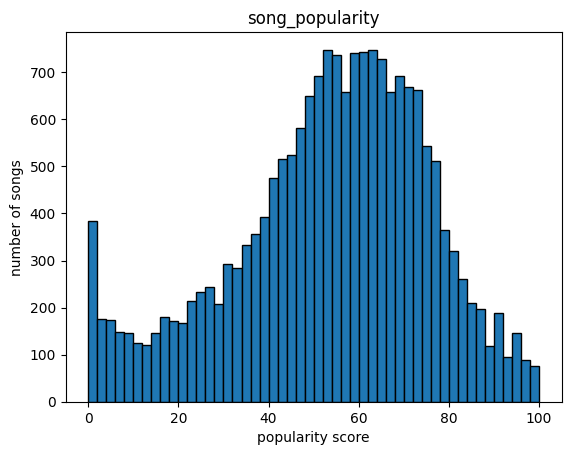

In [7]:
song_popularity_distribution = song_data["song_popularity"]
plt.hist(song_popularity_distribution, bins=50, edgecolor='black')
plt.title("song_popularity")
plt.xlabel("popularity score")
plt.ylabel("number of songs")
plt.show()

In [8]:
print(song_data.head())  # Inspect the first few rows
print(song_data.dtypes)  # Check the data types of each column

                    song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  
0    -4.095           1       0.0294  167.060               4      

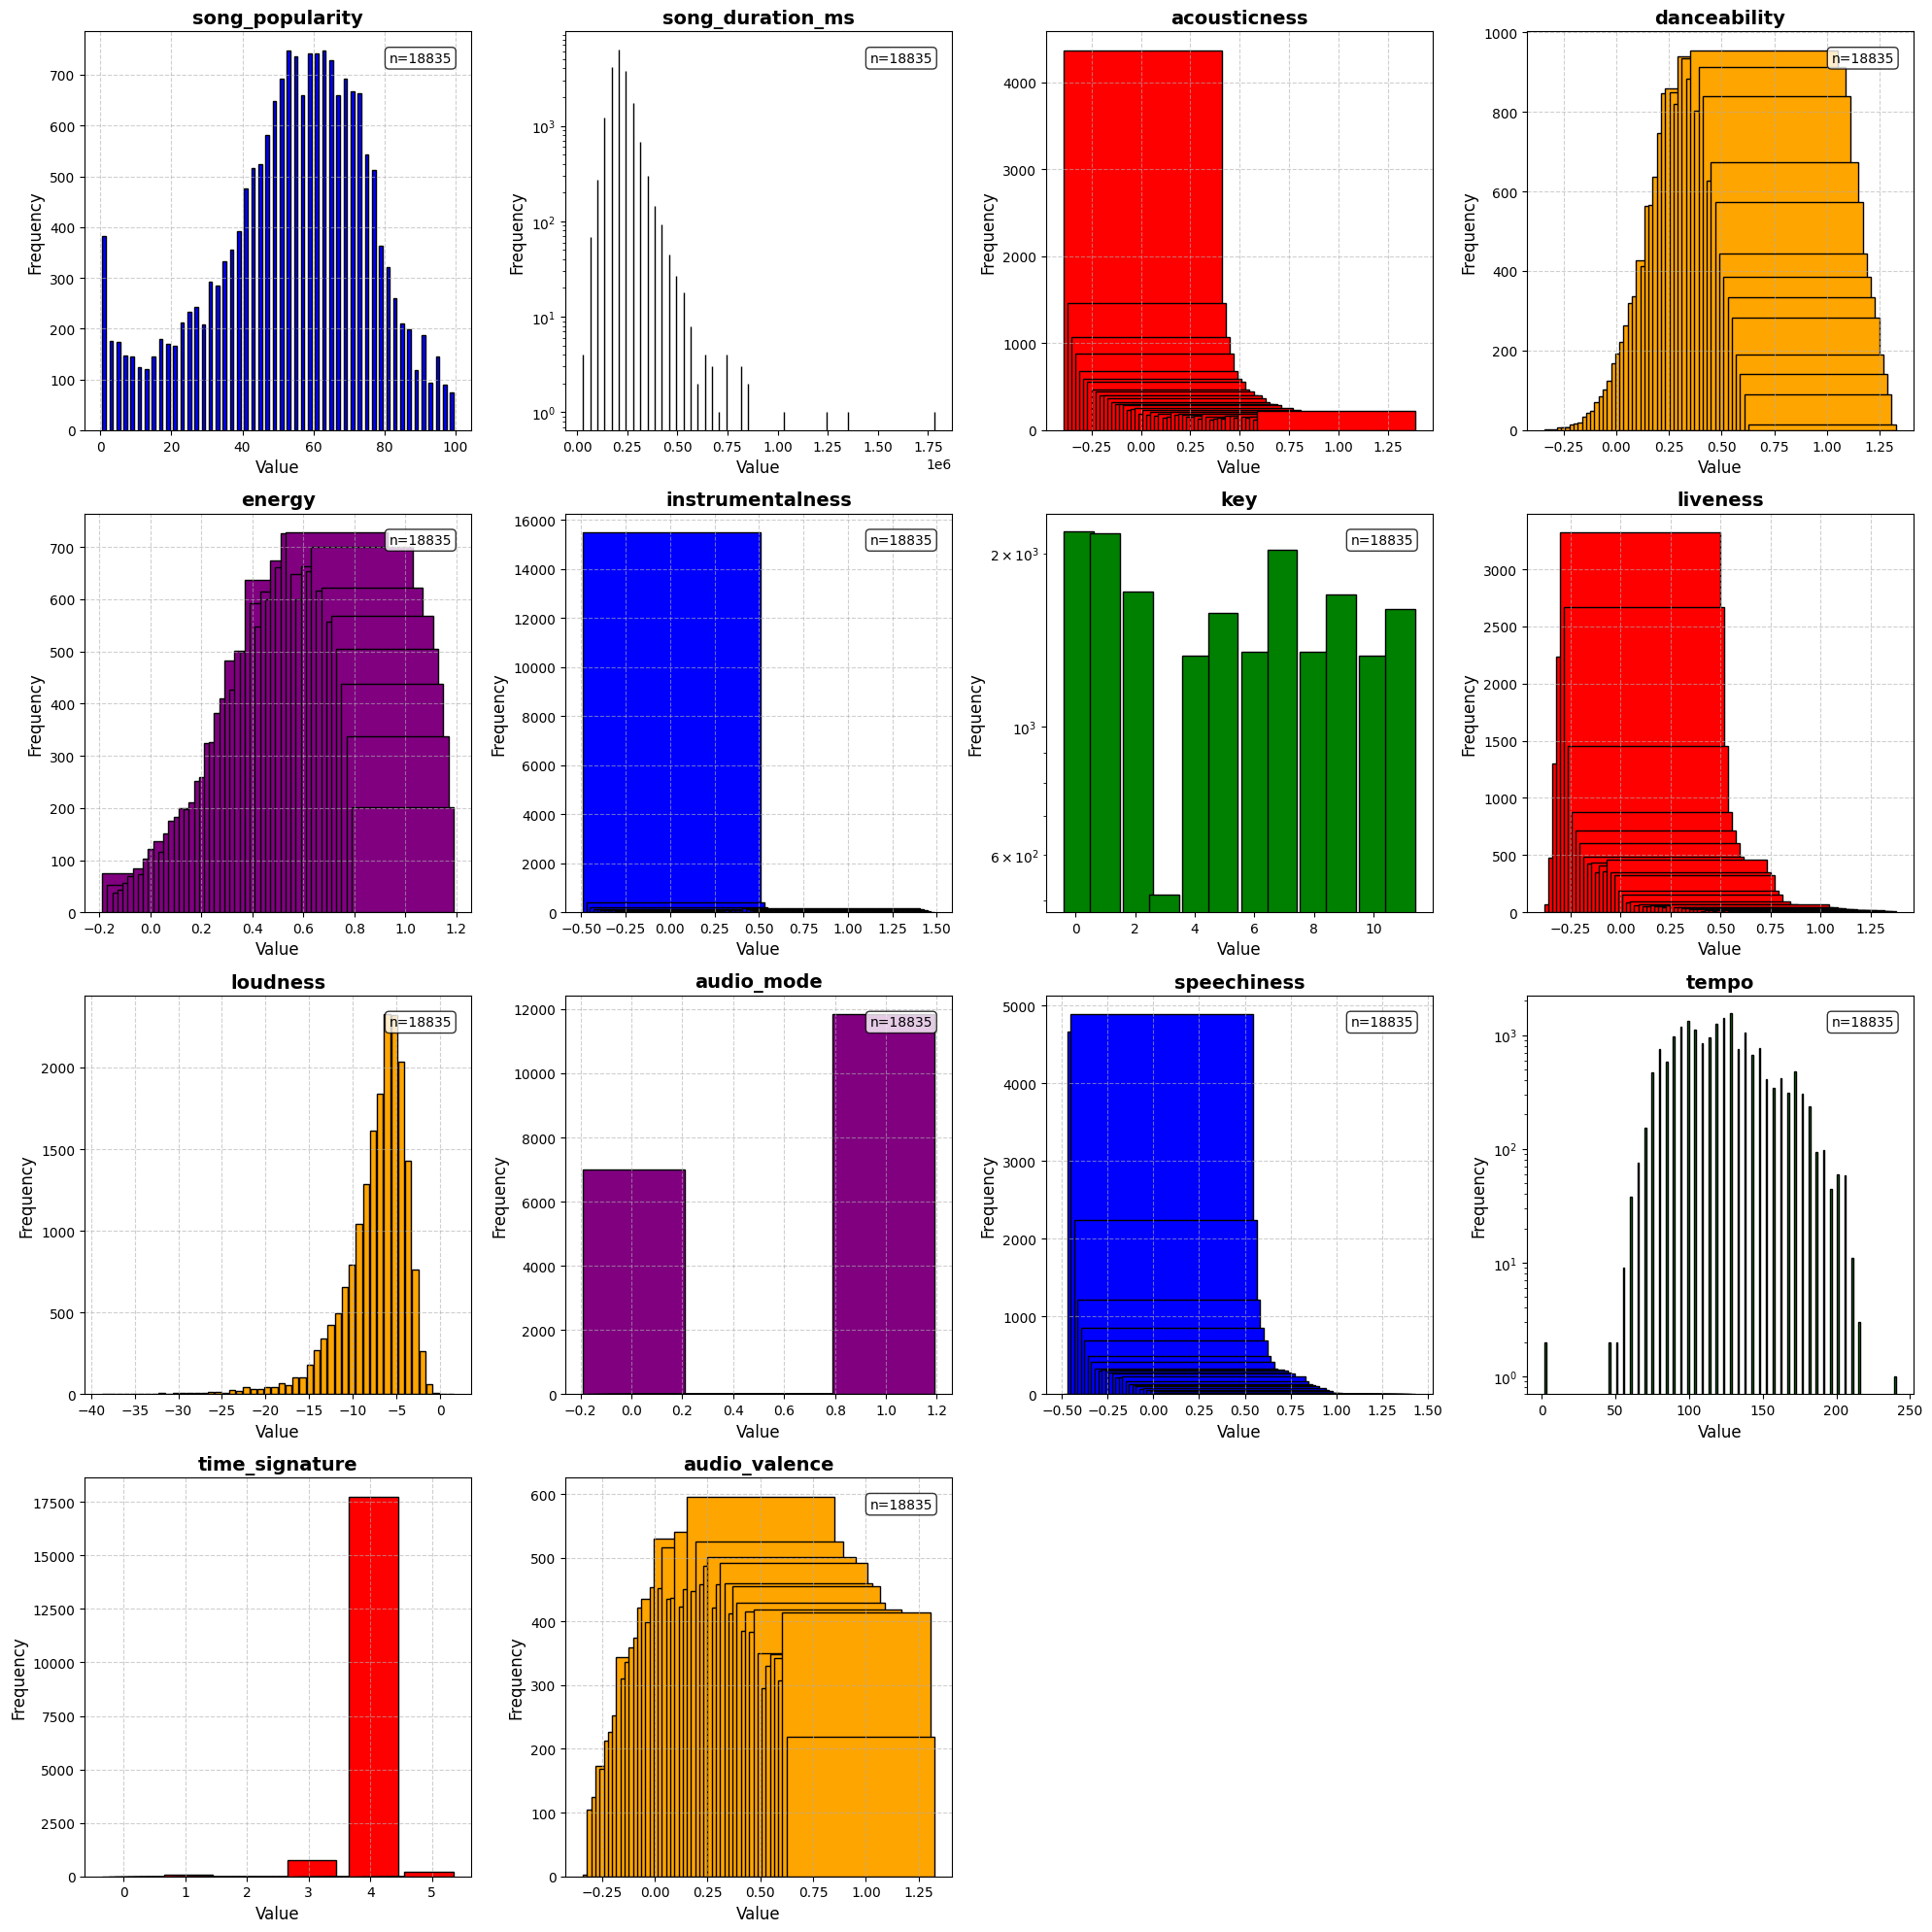

In [26]:
import matplotlib.pyplot as plt

# Template for customizing a single plot
def customize_plot(ax, data, title, xlabel, ylabel, color, bins=50, bin_width=None, grid=True, annotate=True, log=False, xlim=None, ylim=None):
    """
    Customizes a single plot with given parameters.
    
    Parameters:
        ax (AxesSubplot): The subplot axis to customize.
        data (Series): The data to plot.
        title (str): Title of the plot.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
        color (str): Color of the histogram bars.
        bins (int): Number of bins in the histogram.
        bin_width (float): Width of the bars in the histogram.
        grid (bool): Whether to show grid lines.
        annotate (bool): Whether to annotate the count of values.
        log (bool): Whether to apply logarithmic scaling on the y-axis.
        xlim (tuple): Limits for the x-axis (min, max).
        ylim (tuple): Limits for the y-axis (min, max).
    """
    # Compute histogram data
    counts, edges = np.histogram(data, bins=bins)
    
    # Use bin_width if specified
    if bin_width:
        bin_centers = 0.5 * (edges[:-1] + edges[1:])
        ax.bar(bin_centers, counts, width=bin_width, color=color, edgecolor='black', log=log)
    else:
        ax.hist(data, bins=bins, edgecolor='black', color=color, log=log)
    
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    
    if grid:
        ax.grid(True, linestyle='--', alpha=0.6)
    
    if annotate:
        ax.text(0.95, 0.95, f"n={len(data)}", transform=ax.transAxes,
                ha="right", va="top", fontsize=10,
                bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))
    
    if xlim:
        ax.set_xlim(xlim)
    if ylim:
        ax.set_ylim(ylim)

# Main plotting logic
numeric_columns = song_data.select_dtypes(include=["number"]).columns

# Set up a grid for 14 plots (4x4 grid as an example)
fig, axes = plt.subplots(4, 4, figsize=(20, 20))  # Adjust grid size and figure size as needed
axes = axes.flatten()  # Flatten to 1D for easy iteration

# Define specific settings for each plot
custom_settings = [
    {"color": "blue", "bins": 50, "bin_width": 1.0, "grid": True, "annotate": True, "log": False, "xlim": None, "ylim": None},
    {"color": "green", "bins": 50, "bin_width": 1.0, "grid": False, "annotate": True, "log": True, "xlim": None, "ylim": None},
    {"color": "red", "bins": 50, "bin_width": 0.8, "grid": True, "annotate": False, "log": False, "xlim": None, "ylim": None},
    {"color": "orange", "bins": 50, "bin_width": 0.7, "grid": True, "annotate": True, "log": False, "xlim": None, "ylim": None},
    {"color": "purple", "bins": 50, "bin_width": 0.4, "grid": True, "annotate": True, "log": False, "xlim": None, "ylim": None},
    {"color": "blue", "bins": 50, "bin_width": 1.0, "grid": True, "annotate": True, "log": False, "xlim": None, "ylim": None},
    {"color": "green", "bins": 50, "bin_width": 1.0, "grid": False, "annotate": True, "log": True, "xlim": None, "ylim": None},
    {"color": "red", "bins": 50, "bin_width": 0.8, "grid": True, "annotate": False, "log": False, "xlim": None, "ylim": None},
    {"color": "orange", "bins": 50, "bin_width": 0.7, "grid": True, "annotate": True, "log": False, "xlim": None, "ylim": None},
    {"color": "purple", "bins": 50, "bin_width": 0.4, "grid": True, "annotate": True, "log": False, "xlim": None, "ylim": None},
    {"color": "blue", "bins": 50, "bin_width": 1.0, "grid": True, "annotate": True, "log": False, "xlim": None, "ylim": None},
    {"color": "green", "bins": 50, "bin_width": 1.0, "grid": False, "annotate": True, "log": True, "xlim": None, "ylim": None},
    {"color": "red", "bins": 50, "bin_width": 0.8, "grid": True, "annotate": False, "log": False, "xlim": None, "ylim": None},
    {"color": "orange", "bins": 50, "bin_width": 0.7, "grid": True, "annotate": True, "log": False, "xlim": None, "ylim": None},
    {"color": "purple", "bins": 50, "bin_width": 0.4, "grid": True, "annotate": True, "log": False, "xlim": None, "ylim": None},
    # Add more settings as needed for each column
]

# Loop through the numeric columns and plot
for i, column in enumerate(numeric_columns):
    if i >= len(custom_settings):  # Default settings if not enough customizations are provided
        custom_settings.append({"color": "gray", "bins": 50, "bin_width": None, "grid": True, "annotate": True, "log": False, "xlim": None, "ylim": None})
    
    settings = custom_settings[i]
    data = song_data[column].dropna()  # Drop NaN values before plotting
    
    customize_plot(
        ax=axes[i],
        data=data,
        title=column,
        xlabel="Value",
        ylabel="Frequency",
        color=settings["color"],
        bins=settings["bins"],
        bin_width=settings["bin_width"],
        grid=settings["grid"],
        annotate=settings["annotate"],
        log=settings["log"],
        xlim=settings["xlim"],
        ylim=settings["ylim"]
    )

# Hide unused subplots if there are fewer than 16 columns
for j in range(len(numeric_columns), len(axes)):
    axes[j].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

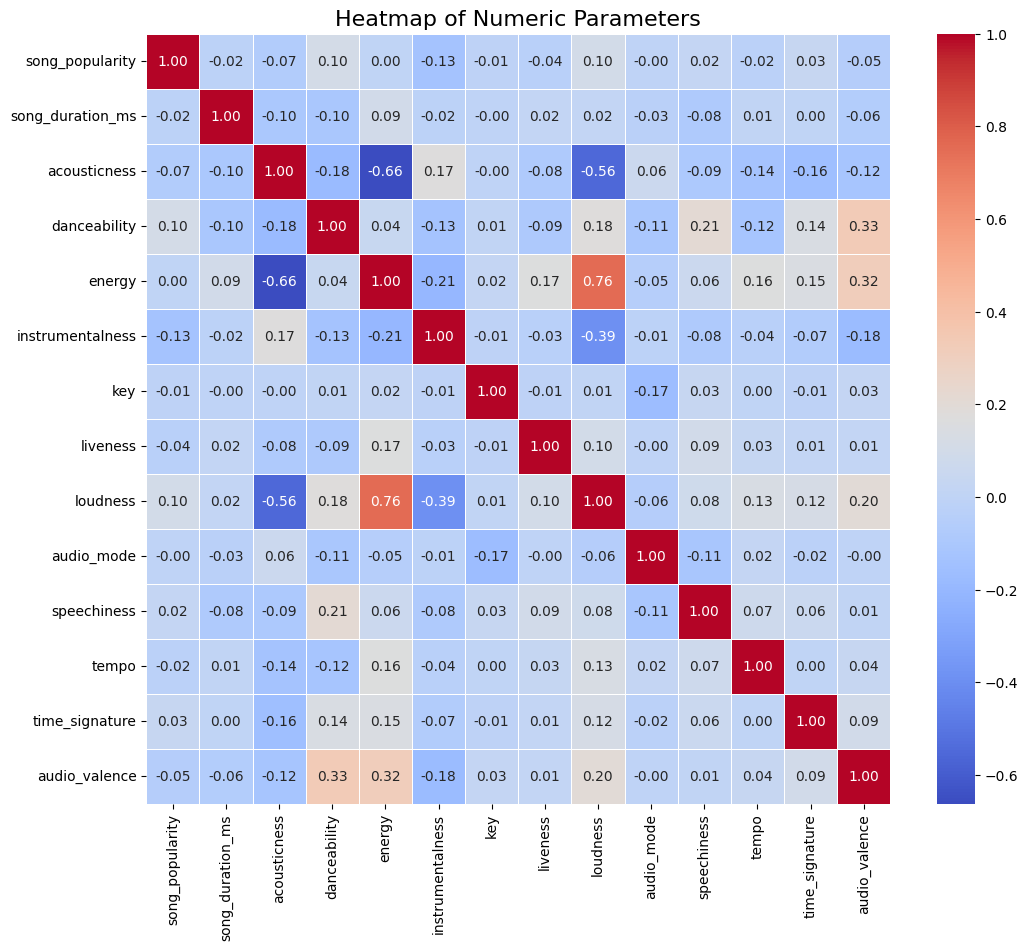

In [10]:
# Select numeric columns for heatmap
numeric_data = song_data.select_dtypes(include=["number"])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Numeric Parameters", fontsize=16)
plt.show()

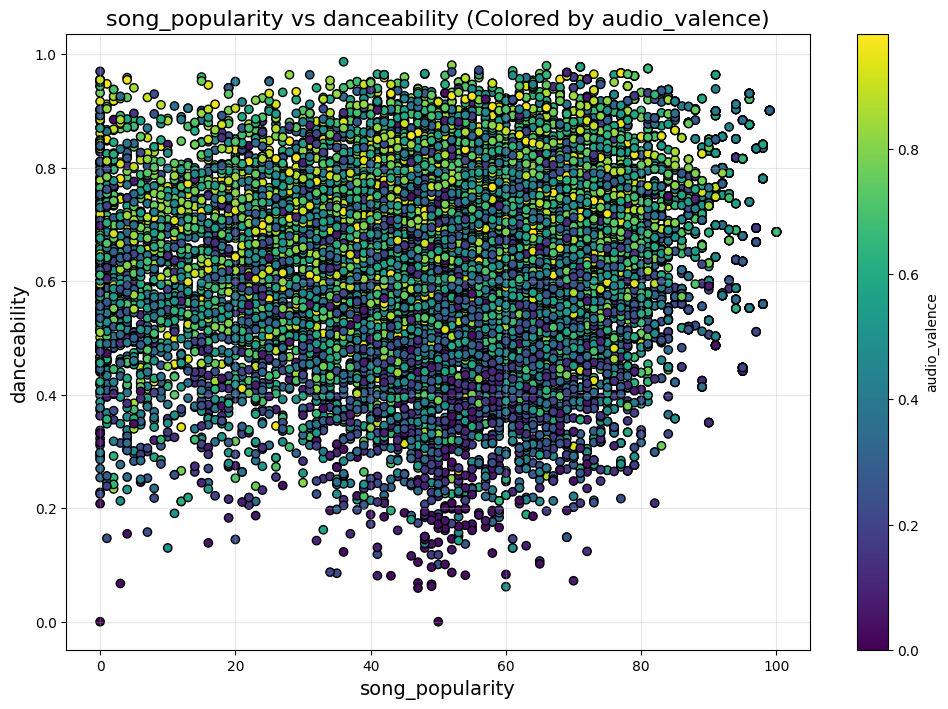

In [56]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    song_data['song_popularity'], song_data['danceability'],
    c=song_data['audio_valence'], cmap='viridis', alpha=1, edgecolors='k'  # Set smaller marker size using 's'
)
plt.colorbar(scatter, label='audio_valence')
plt.title('song_popularity vs danceability (Colored by audio_valence)', fontsize=16)
plt.xlabel('song_popularity', fontsize=14)
plt.ylabel('danceability', fontsize=14)
plt.grid(alpha=0.3)
plt.show()

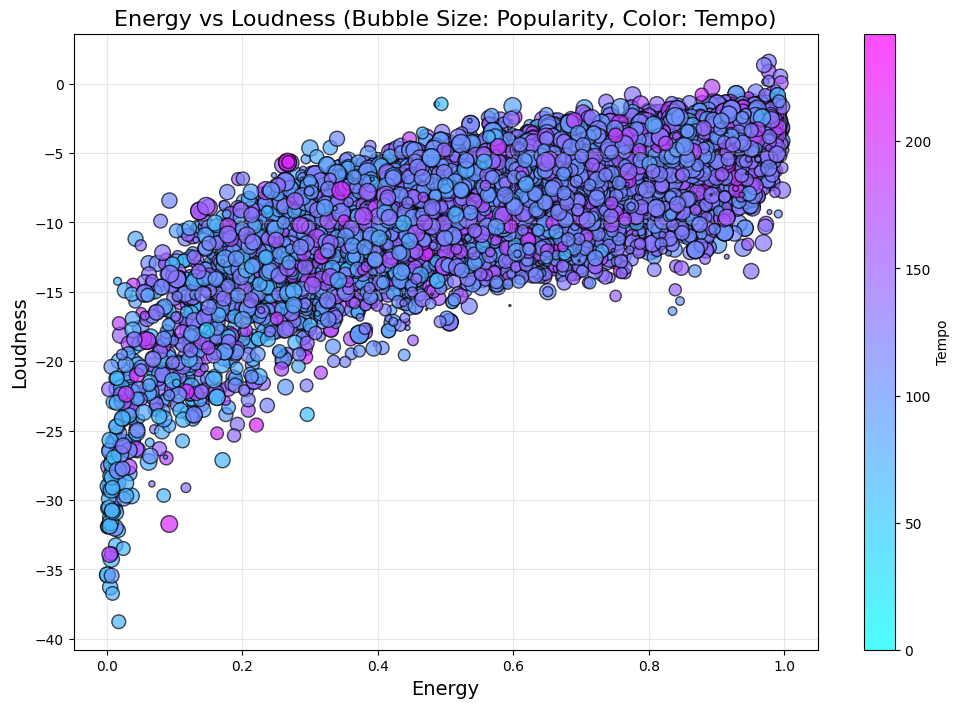

In [57]:
# Energy vs Loudness Scatter Plot with Popularity as Size
plt.figure(figsize=(12, 8))
bubble = plt.scatter(
    song_data['energy'], song_data['loudness'],
    s=song_data['song_popularity'] * 2, c=song_data['tempo'], 
    cmap='cool', alpha=0.7, edgecolors='k',
)
plt.colorbar(bubble, label='Tempo')
plt.title('Energy vs Loudness (Bubble Size: Popularity, Color: Tempo)', fontsize=16)
plt.xlabel('Energy', fontsize=14)
plt.ylabel('Loudness', fontsize=14)
plt.grid(alpha=0.3)
plt.show()